In [1]:
import warnings
warnings.filterwarnings('ignore')

# The stochastic SIR model

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from py_hawkesn_sir.py_hawkesn_sir.sir_stochastic \
    import StochasticSIR

In [3]:
plt.rc('font', family='serif', serif='Palatino', size=8)
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

## Plotting the model with two different sets of parameters

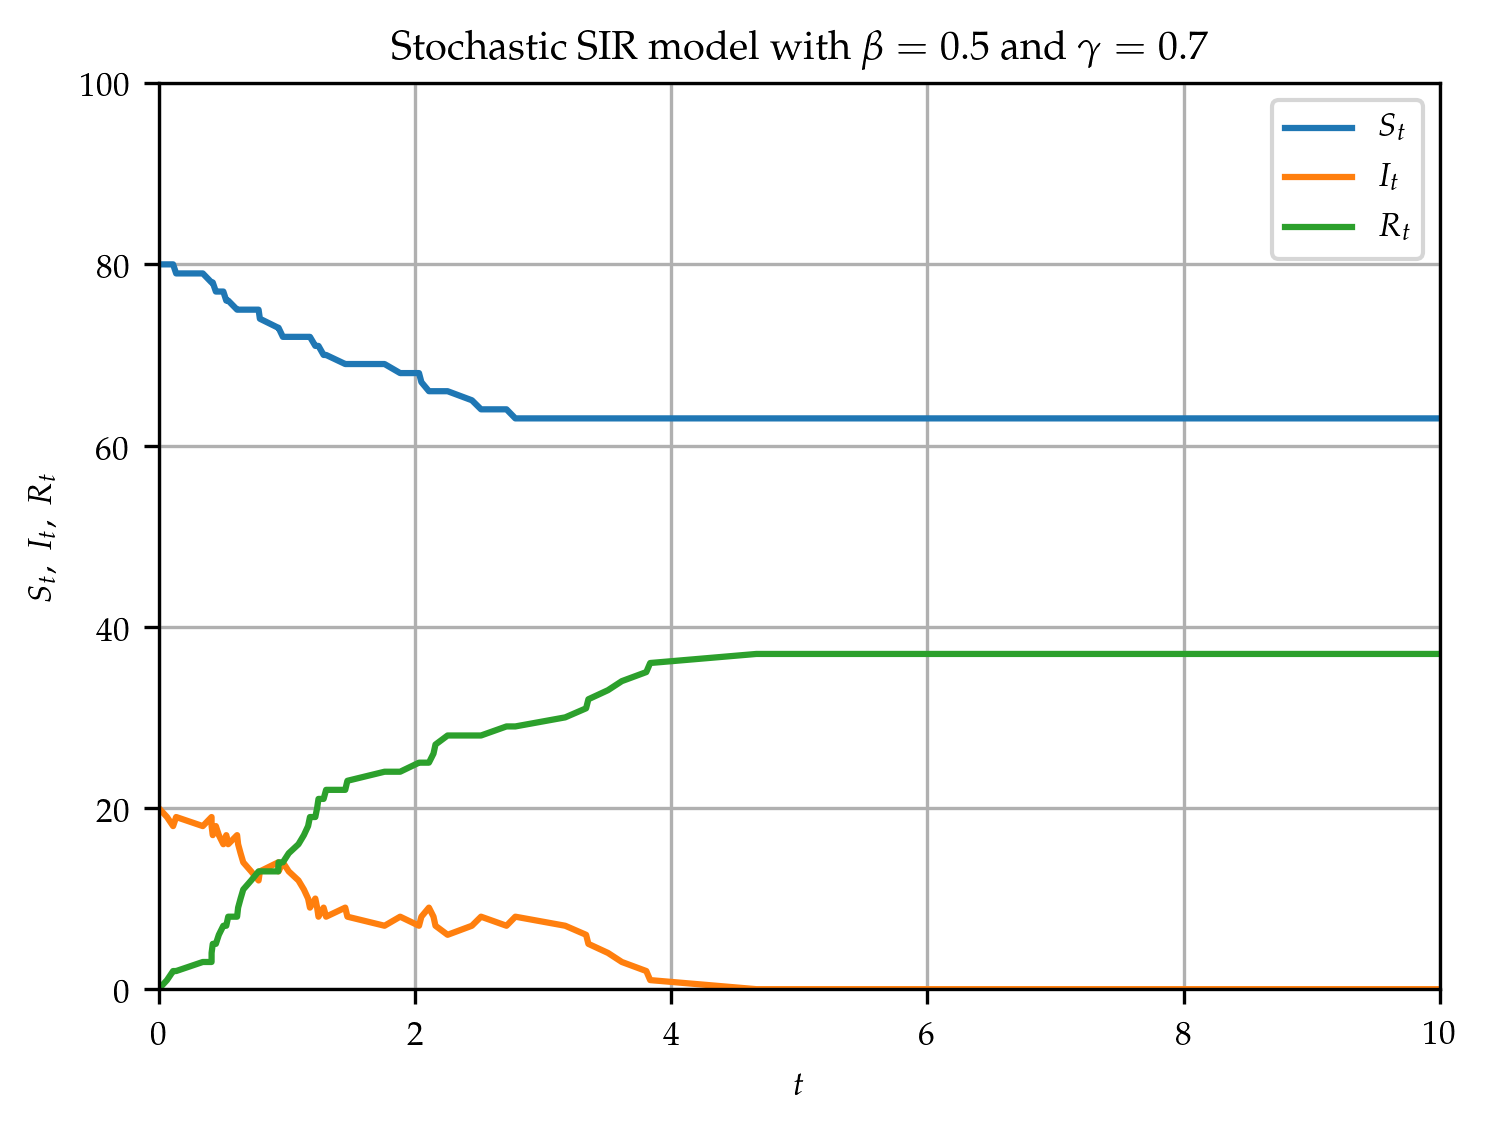

In [4]:
s_0 = 80
i_0 = 20
r_0 = 0
beta1 = 0.5
gamma1 = 0.7
sir1 = StochasticSIR(
    s_0=s_0, i_0=i_0, r_0=r_0, beta=beta1, gamma=gamma1)
sir1.simulate(random_state=3)
sir1.plot()

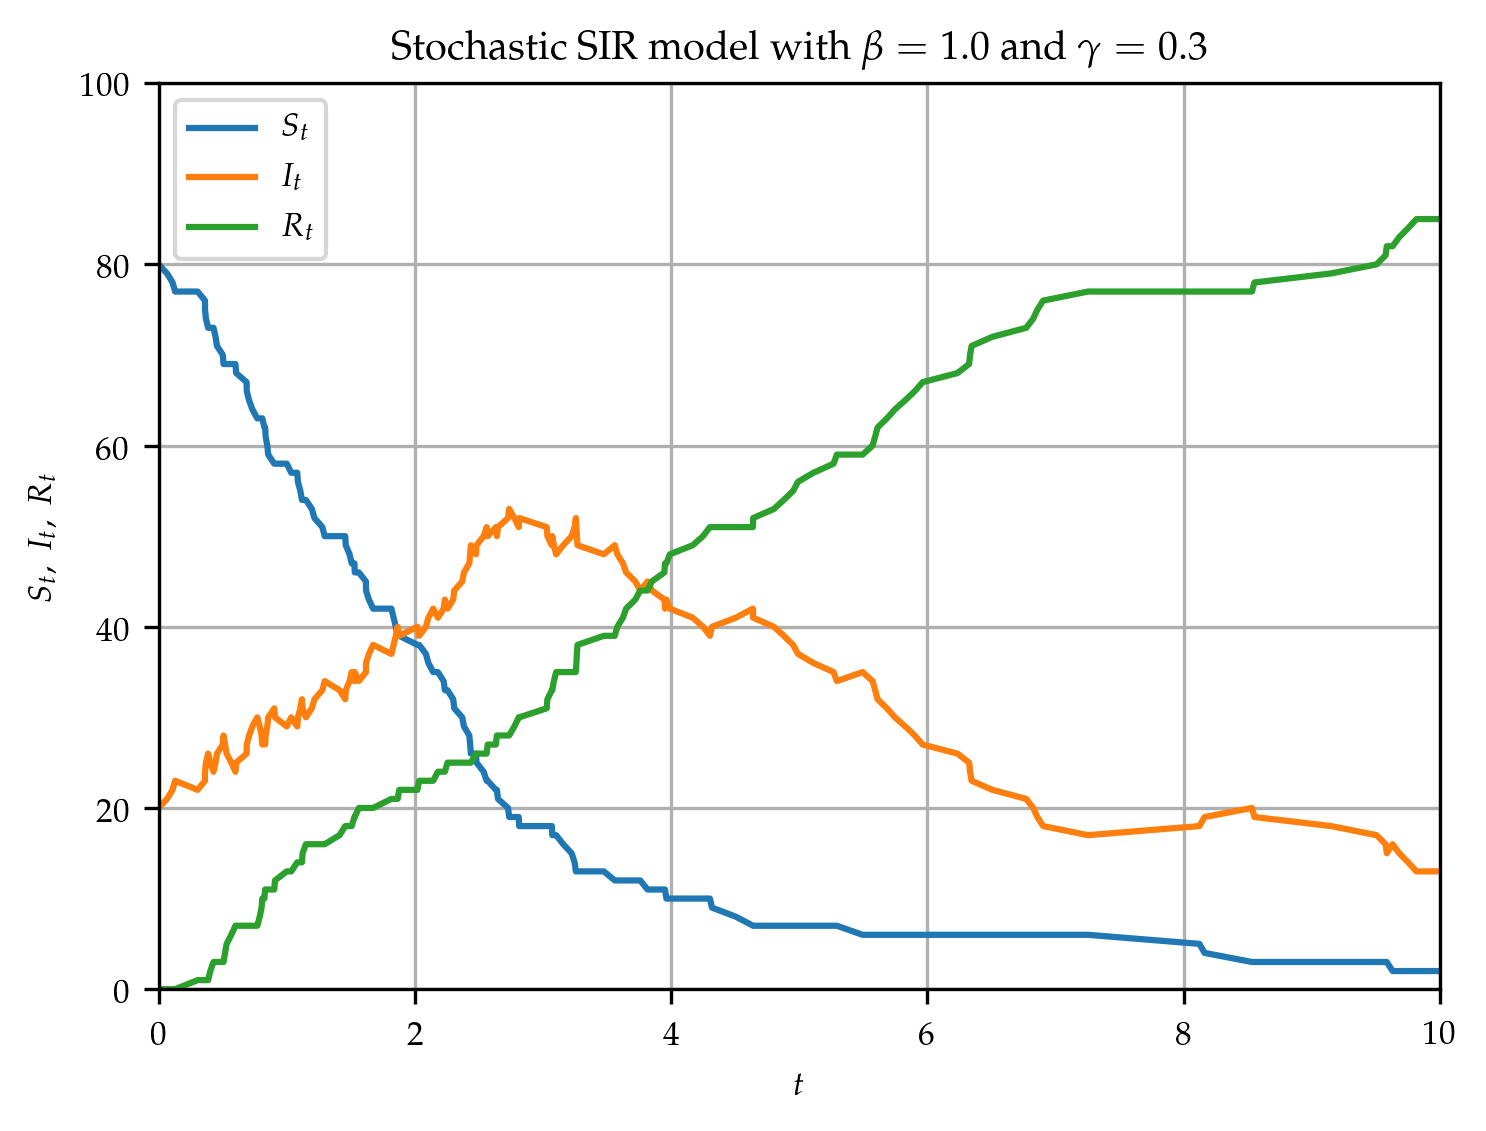

In [5]:
beta2 = 1.0
gamma2 = 0.3
sir2 = StochasticSIR(
    s_0=s_0, i_0=i_0, r_0=r_0, beta=beta2, gamma=gamma2)
sir2.simulate(random_state=3)
sir2.plot()

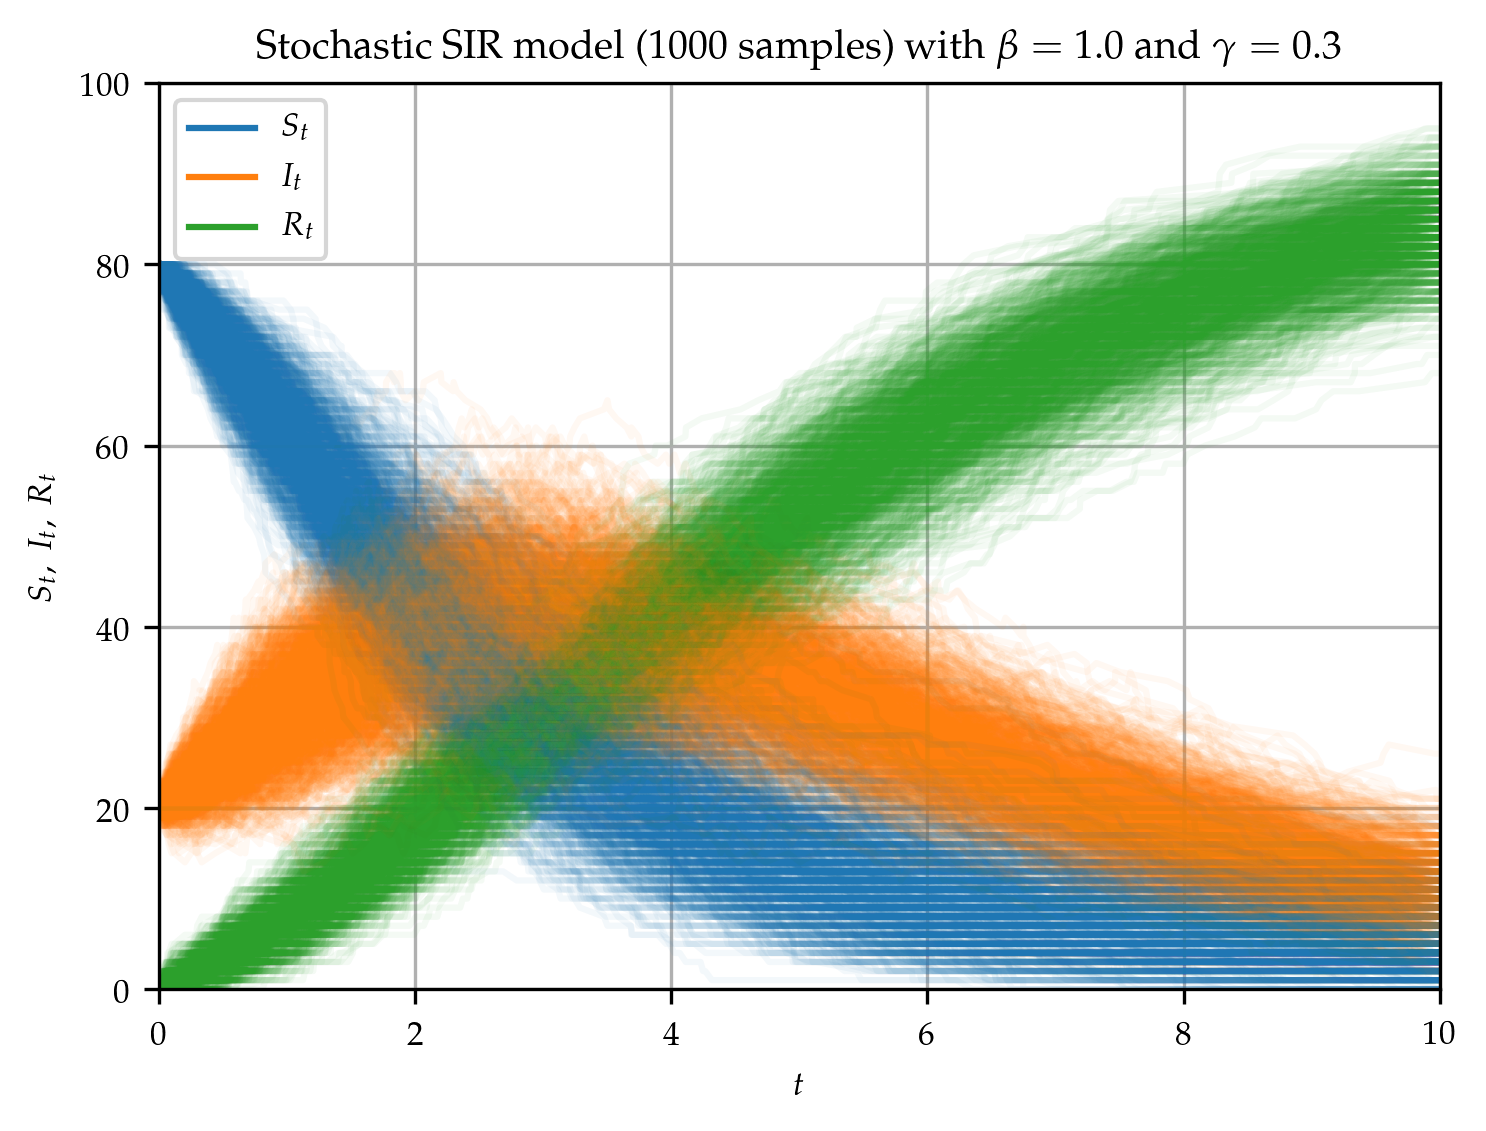

In [6]:
sir1000 = StochasticSIR(
    s_0=s_0, i_0=i_0, r_0=r_0, beta=beta2, gamma=gamma2)
sir1000.simulate(n_simulations=1000, random_state=3)
sir1000.plot()

## Fitting a Stochastic SIR Model

In [7]:
s_0 = 1000
i_0 = 300
r_0 = 0
beta = 1
gamma = 0.2
t_max = 11
n_simulations = 20
random_state = 0

In [8]:
sir_model = StochasticSIR(s_0=s_0,
                          i_0=i_0,
                          r_0=r_0,
                          beta=beta,
                          gamma=gamma)
sir_model.simulate(t_max=t_max,
                   n_simulations=n_simulations,
                   random_state=random_state)

In [9]:
sir_model.fit(n_start=1000,
              beta_start=0.1,
              gamma_start=0.1)

[(array([1.00000006e+03, 7.51830161e-01, 2.10809970e-01]),
  -7861.397419269986,
  {'grad': array([ 0.00491127,  0.01200533, -0.00154614]),
   'task': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH',
   'funcalls': 52,
   'nit': 10,
   'warnflag': 0}),
 (array([1.00000004e+03, 7.89116650e-01, 1.99458708e-01]),
  -7892.279894226631,
  {'grad': array([ 0.00154614, -0.00245564, -0.00118234]),
   'task': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH',
   'funcalls': 52,
   'nit': 10,
   'warnflag': 0}),
 (array([1.00000006e+03, 7.81849240e-01, 1.97389960e-01]),
  -7838.679424274035,
  {'grad': array([ 0.00418368, -0.00227374,  0.00100044]),
   'task': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH',
   'funcalls': 52,
   'nit': 10,
   'warnflag': 0}),
 (array([1.00000008e+03, 7.33539123e-01, 1.95369161e-01]),
  -7729.755122524038,
  {'grad': array([0.00663931, 0.0080945 , 0.00563887]),
   'task': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH',
   'funcalls': 48,
   'nit': 9,


In [10]:
sir_model_max = StochasticSIR(s_0=s_0,
                              i_0=i_0,
                              r_0=r_0,
                              beta=beta,
                              gamma=gamma)
sir_model_max.simulate(t_max=t_max,
                       n_simulations=n_simulations,
                       random_state=random_state)
sir_model_max.fit(n_start=None,
                  beta_start=0.1,
                  gamma_start=0.1)

[(array([1.27400000e+03, 9.57823459e-01, 2.10810094e-01]),
  -7861.39741926656,
  {'grad': array([0.00291038, 0.0001819 , 0.00327418]),
   'task': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH',
   'funcalls': 52,
   'nit': 10,
   'warnflag': 0}),
 (array([1.28600000e+03, 1.01480772e+00, 1.99458617e-01]),
  -7892.2798942242325,
  {'grad': array([-0.0079126 , -0.00591172, -0.01427907]),
   'task': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH',
   'funcalls': 60,
   'nit': 12,
   'warnflag': 0}),
 (array([1.29000000e+03, 1.00860140e+00, 1.97391108e-01]),
  -7838.679424186582,
  {'grad': array([-0.00227374,  0.00945874,  0.03246896]),
   'task': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH',
   'funcalls': 52,
   'nit': 10,
   'warnflag': 0}),
 (array([1.28300003e+03, 9.41128897e-01, 1.95369119e-01]),
  -7729.7551225245,
  {'grad': array([ 0.00209184, -0.00154614, -0.00209184]),
   'task': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH',
   'funcalls': 52,
   'nit': 10,
 

In [11]:
ratios = [5, 4, 3, 2, 1, 1/2, 1/3, 1/4, 1/5]
adjustments = [(1-0.2*r) / (1+r) for r in ratios]
betas = [round(1-adj, 2) for adj in adjustments]
gammas = list(reversed(betas))
ratios = [round(r, 2) for r in ratios]
betas, gammas

([1.0, 0.96, 0.9, 0.8, 0.6, 0.4, 0.3, 0.24, 0.2],
 [0.2, 0.24, 0.3, 0.4, 0.6, 0.8, 0.9, 0.96, 1.0])

In [12]:
t_max = 11
times = np.arange(1, t_max+1)

In [13]:
from concurrent import futures
from itertools import repeat

from py_hawkesn_sir.py_hawkesn_sir.\
  sir_stochastic_parallel import fit

for b_ind in range(len(betas)):
  model = StochasticSIR(s_0=s_0,
                        i_0=i_0,
                        r_0=r_0,
                        beta=betas[b_ind],
                        gamma=gammas[b_ind])
  
  model.simulate(t_max=t_max,
                 n_simulations=n_simulations,
                 random_state=random_state)
  
  for t in reversed(times):
    for sim_ind in range(n_simulations):
      model.data_[sim_ind] = \
        model.data_[sim_ind][model.data_[sim_ind].t<=t]
    with futures.ProcessPoolExecutor() as executor:
      res = executor.map(
        fit,
        model.data_,  # simulations per parameters comb.
        repeat(None),  # use n_infections as init. value
        repeat(.1),  # initial beta
        repeat(.1),  # initial gamma
        repeat(False),  # verbose
        range(n_simulations)  # observation id
      )
    res = list(res)
    fname = "beta" + str(betas[b_ind]) + "_gamma" + \
            str(gammas[b_ind])
    fname = (fname+"_t_max"+str(t)).replace(".", "") + \
            ".py"
    with open(fname, "w") as file:
      file.write("from numpy import array\n" +
                 "result = " + repr(res))

In [14]:
from copy import deepcopy
import importlib
from statistics import mean, median

res = [[None for _ in range(len(times))]
       for __ in range(len(betas))]
res_mean = deepcopy(res)
res_median = deepcopy(res)
res_85_percentile = deepcopy(res)
res_15_percentile = deepcopy(res)

for i in range(len(betas)):
    for j, t in enumerate(times):
      fname = ("beta" + str(betas[i]) + "_"
               + "gamma" + str(gammas[i]) + "_"
               + "t_max" + str(t)).replace(".", "")
      result_module = importlib.import_module(fname)
      results_sims = [result_module.result[k][0][0]
                      for k in
                      range(len(result_module.result))]
      res_mean[i][j] = median(results_sims)
      res_median[i][j] = median(results_sims)
      res_85_percentile[i][j] = np.percentile(
        results_sims, 85, interpolation="nearest")
      res_15_percentile[i][j] = np.percentile(
        results_sims, 15, interpolation="nearest")

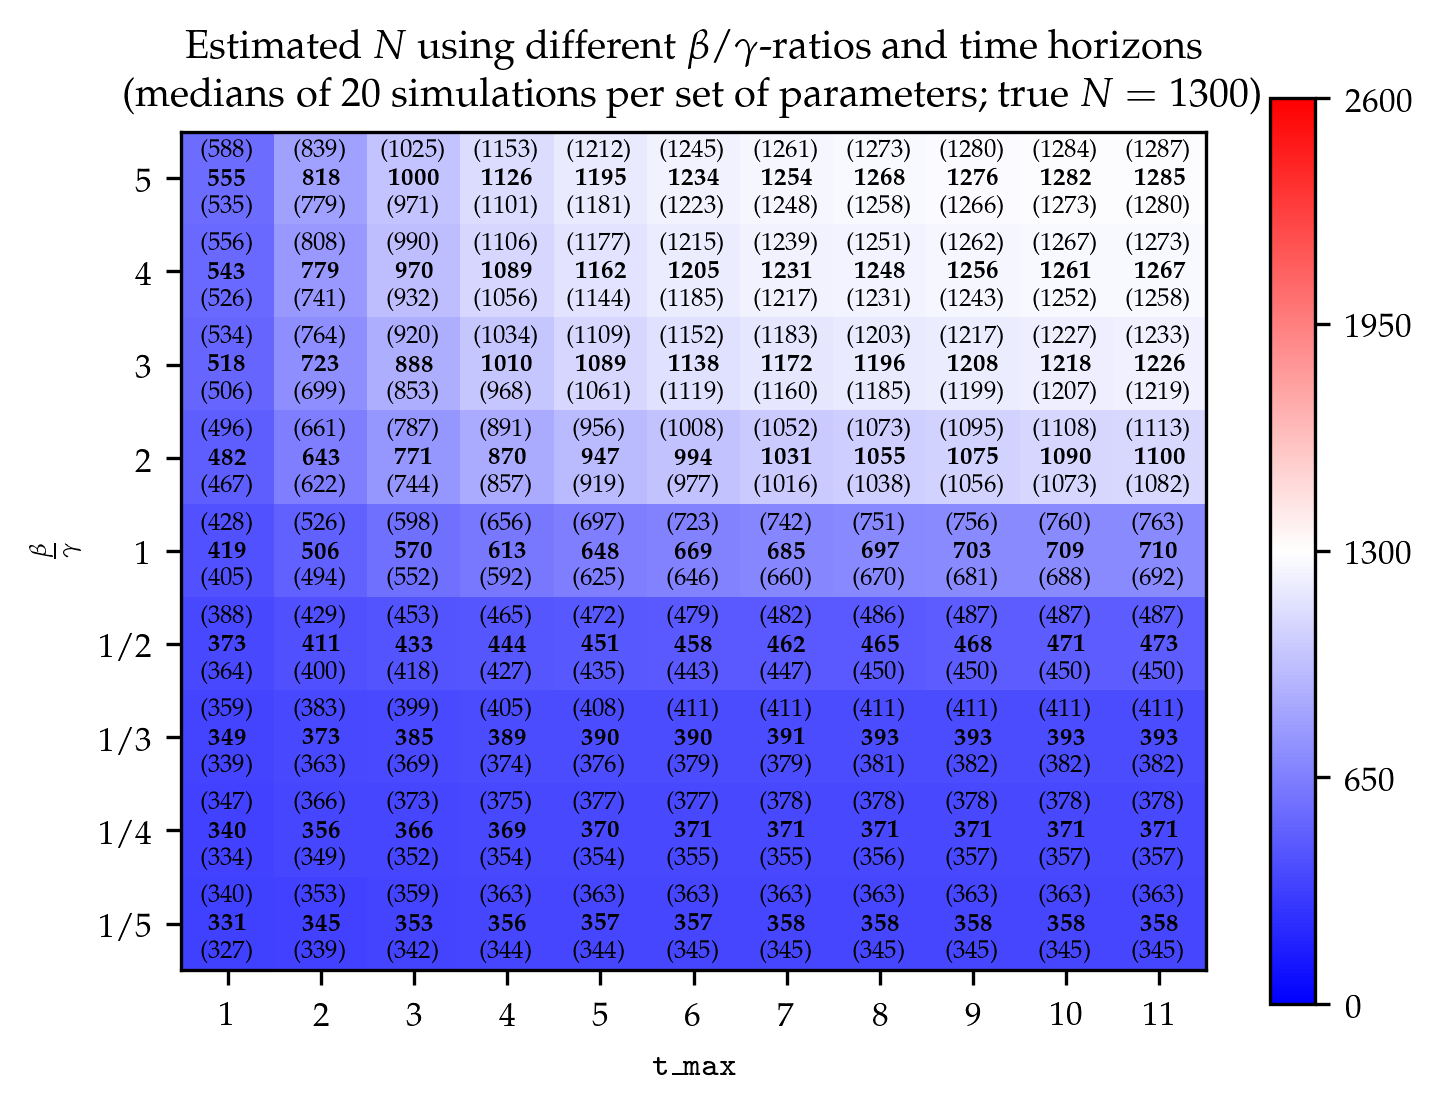

In [15]:
import matplotlib as mpl

upper_bound_colormap = 2 * 1300
n_simulations = 20

fig = plt.figure(dpi=300, figsize=(5.51, 4))
ax = fig.gca()

ax.set_title(r"Estimated $N$ using different " +
             r"$\beta$/$\gamma$-ratios and time " +
             "horizons\n(medians of " +
             str(n_simulations) +
             " simulations per set" +
             " of parameters; true $N = 1300$)")
color_norm = mpl.colors.Normalize(
  vmin=0,
  vmax=upper_bound_colormap)
im = ax.imshow(res_median, cmap='bwr', norm=color_norm)

# We want to show all ticks...
ax.set_xticks(range(t_max))
ax.set_yticks(range(len(betas)))
# ... and label them with the respective list entries
ax.set_xticklabels(range(1, t_max+1))
ratio_ints = [str(round(betas[i]/gammas[i]))
              for i in range(len(betas)//2)]
ratio_ticks = ratio_ints + ["1"] + ["1/"+r for r in
                                    ratio_ints[::-1]]
ax.set_yticklabels(ratio_ticks)

ax.set_xlabel(r"$\texttt{t\_max}$")
ax.set_ylabel(r"$\frac{\beta}{\gamma}$")

# Loop over data dimensions and create text annotations.
for i in range(len(betas)):
    for j in range(t_max):
        text = ax.text(j, i,
                       "(" + str(int(round(res_85_percentile[i][j]))) + ")" +
                       "\n" +
                       "$\\bf{" + str(int(round(res_median[i][j]))) + "}$" +
                       "\n" +
                       "(" + str(int(round(res_15_percentile[i][j]))) + ")",
                       ha="center", va="center",
                       color="black", size=6)
plt.colorbar(
  im,
  ticks=np.linspace(0, upper_bound_colormap, 5),
  boundaries=np.arange(upper_bound_colormap+1))

### Fitting N with $\beta$ and $\gamma$ Fixed

In [16]:
for b_ind in range(len(betas)):
  model = StochasticSIR(s_0=s_0,
                        i_0=i_0,
                        r_0=r_0,
                        beta=betas[b_ind],
                        gamma=gammas[b_ind])
  
  model.simulate(t_max=t_max,
                 n_simulations=n_simulations,
                 random_state=random_state)

  for t in reversed(times):
    for sim_ind in range(n_simulations):
      model.data_[sim_ind] = \
        model.data_[sim_ind][model.data_[sim_ind].t<=t]
    with futures.ProcessPoolExecutor() as executor:
      res = executor.map(fit,
        model.data_,  # simulations for one parameter comb.
        repeat(None),  # use n_infections as initial value
        repeat(betas[b_ind]),  # initial beta
        repeat(gammas[b_ind]),  # initial gamma
        repeat(False),  # verbose
        range(n_simulations),  # observation id
        repeat(None),  # step size
        repeat(True)  # beta_gamma_fixed
      )
    res = list(res)
    fname = "n_only_beta" + str(betas[b_ind]) + "_gamma" + \
            str(gammas[b_ind])
    fname = (fname+"_t_max"+str(t)).replace(".", "") + \
             ".py"
    with open(fname, "w") as file:
      file.write("from numpy import array\n" +
                 "result = " + repr(res))

In [17]:
res = [[None for _ in range(len(times))]
       for __ in range(len(betas))]
res_mean = deepcopy(res)
res_median = deepcopy(res)
res_85_percentile = deepcopy(res)
res_15_percentile = deepcopy(res)

for i in range(len(betas)):
    for j, t in enumerate(times):
      fname = ("n_only_beta" + str(betas[i]) + "_"
               + "gamma" + str(gammas[i]) + "_"
               + "t_max" + str(t)).replace(".", "")
      result_module = importlib.import_module(fname)
      results_sims = [result_module.result[k][0][0]
                      for k in
                      range(len(result_module.result))]
      res_mean[i][j] = mean(results_sims)
      res_median[i][j] = median(results_sims)
      res_85_percentile[i][j] = np.percentile(
        results_sims, 85, interpolation="nearest")
      res_15_percentile[i][j] = np.percentile(
        results_sims, 15, interpolation="nearest")

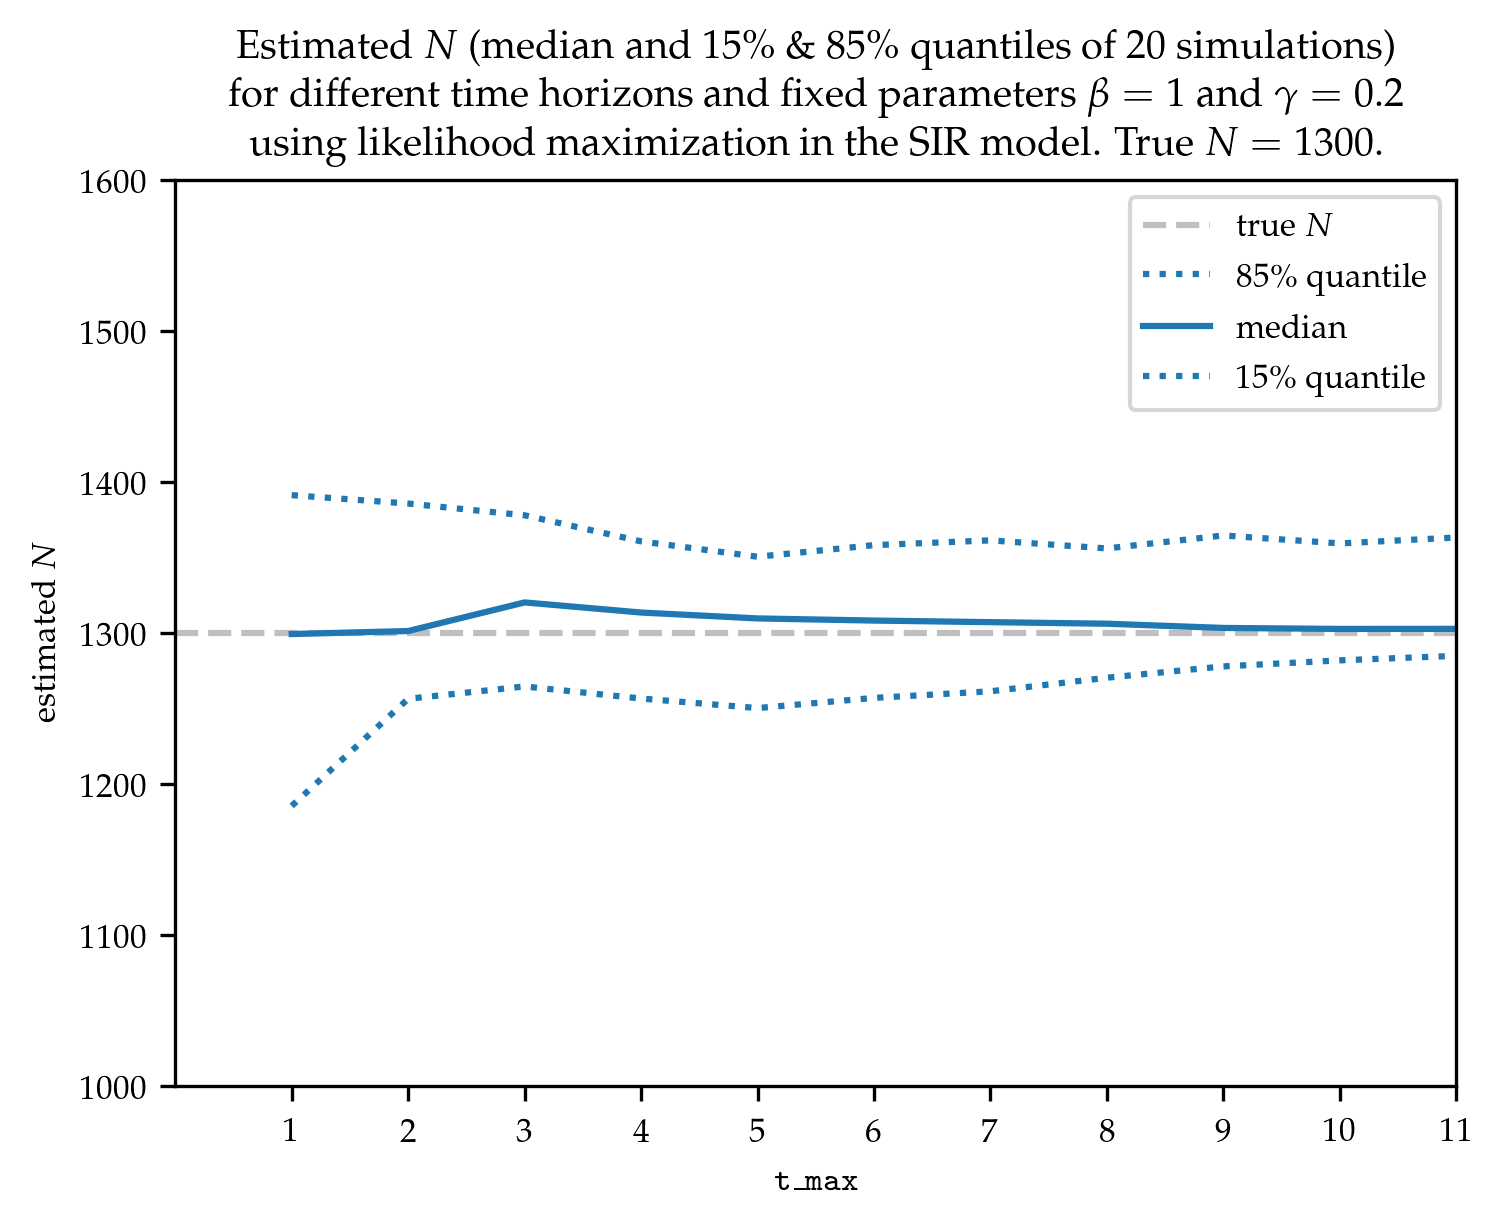

In [18]:
fig = plt.figure(dpi=300, figsize=(5.51, 4))
ax = fig.gca()
tit = r"Estimated $N$ (median and 15\% \& 85\% " + \
"quantiles of $20$ simulations)\n" + \
"for different time horizons and fixed " + \
"parameters $\\beta=1$ and $\\gamma=0.2$\n" + \
"using likelihood maximization in the SIR " + \
"model. True $N = 1300$."
ax.set_title(tit)

ax.set_xlim(0, t_max)
ax.set_ylim(1000, 1600)
ax.set_xlabel(r"$\texttt{t\_max}$")
ax.set_ylabel(r"estimated $N$")

time_ticks = range(1, t_max+1)
ax.set_xticks(time_ticks)
c_true, c_est = "grey", "C0"
ls_true, ls_med, ls_bound = "--", "-", ":"
alpha_true = .5

ax.plot([0] + list(time_ticks),
[1300 for _ in range(t_max+1)],
c=c_true, ls=ls_true, alpha=alpha_true, 
label="true $N$")
ax.plot(time_ticks,
[res_85_percentile[0][j] for j in range(t_max)],
c=c_est, ls=ls_bound, label="$85 \%$ quantile")
ax.plot(time_ticks,
[res_median[0][j] for j in range(t_max)],
c=c_est, ls=ls_med, label="median")
ax.plot(time_ticks,
[res_15_percentile[0][j] for j in range(t_max)],
c=c_est, ls=ls_bound, label="$15 \%$ quantile")
ax.legend()

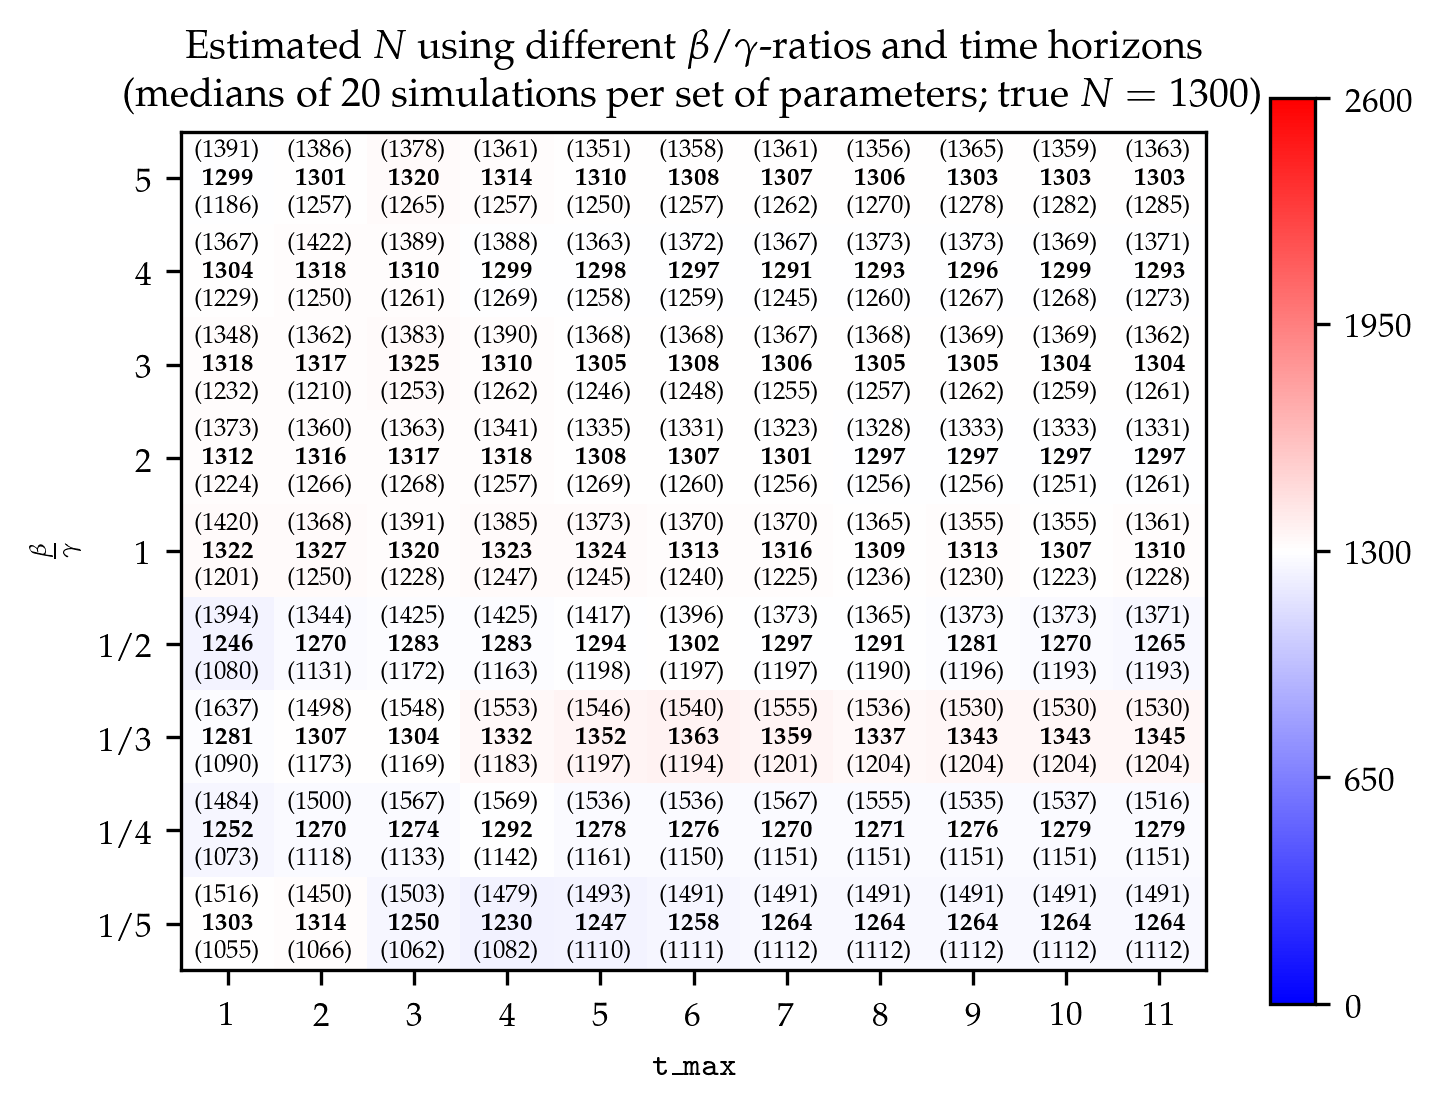

In [19]:
import matplotlib as mpl

upper_bound_colormap = 2 * 1300
n_simulations = 20

fig = plt.figure(dpi=300, figsize=(5.51, 4))
ax = fig.gca()

ax.set_title(r"Estimated $N$ using different " +
             r"$\beta$/$\gamma$-ratios and time " +
             "horizons\n(medians of " +
             str(n_simulations) +
             " simulations per set" +
             " of parameters; true $N = 1300$)")
color_norm = mpl.colors.Normalize(
  vmin=0,
  vmax=upper_bound_colormap)
im = ax.imshow(res_median, cmap='bwr', norm=color_norm)

# We want to show all ticks...
ax.set_xticks(range(t_max))
ax.set_yticks(range(len(betas)))
# ... and label them with the respective list entries
ax.set_xticklabels(range(1, t_max+1))
ratio_ints = [str(round(betas[i]/gammas[i]))
              for i in range(len(betas)//2)]
ratio_ticks = ratio_ints + ["1"] + ["1/"+r for r in
                                    ratio_ints[::-1]]
ax.set_yticklabels(ratio_ticks)

ax.set_xlabel(r"$\texttt{t\_max}$")
ax.set_ylabel(r"$\frac{\beta}{\gamma}$")

# Loop over data dimensions and create text annotations.
for i in range(len(betas)):
    for j in range(t_max):
        text = ax.text(j, i,
                       "(" + str(int(round(res_85_percentile[i][j]))) + ")" +
                       "\n" +
                       "$\\bf{" + str(int(round(res_median[i][j]))) + "}$" +
                       "\n" +
                       "(" + str(int(round(res_15_percentile[i][j]))) + ")",
                       ha="center", va="center",
                       color="black", size=6)
plt.colorbar(
  im,
  ticks=np.linspace(0, upper_bound_colormap, 5),
  boundaries=np.arange(upper_bound_colormap+1))

## Possible States and Transitions

In [20]:
from py_hawkesn_sir.py_hawkesn_sir import util
n = 2
possible_states = util.int_pairs_leq_n_when_summed(n)
possible_states

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (2, 0)]

In [21]:
beta, gamma = 1, 0.5
trans_mat = StochasticSIR.transition_matrix(
n=n, beta=beta, gamma=gamma)
type(trans_mat)

scipy.sparse.csr.csr_matrix

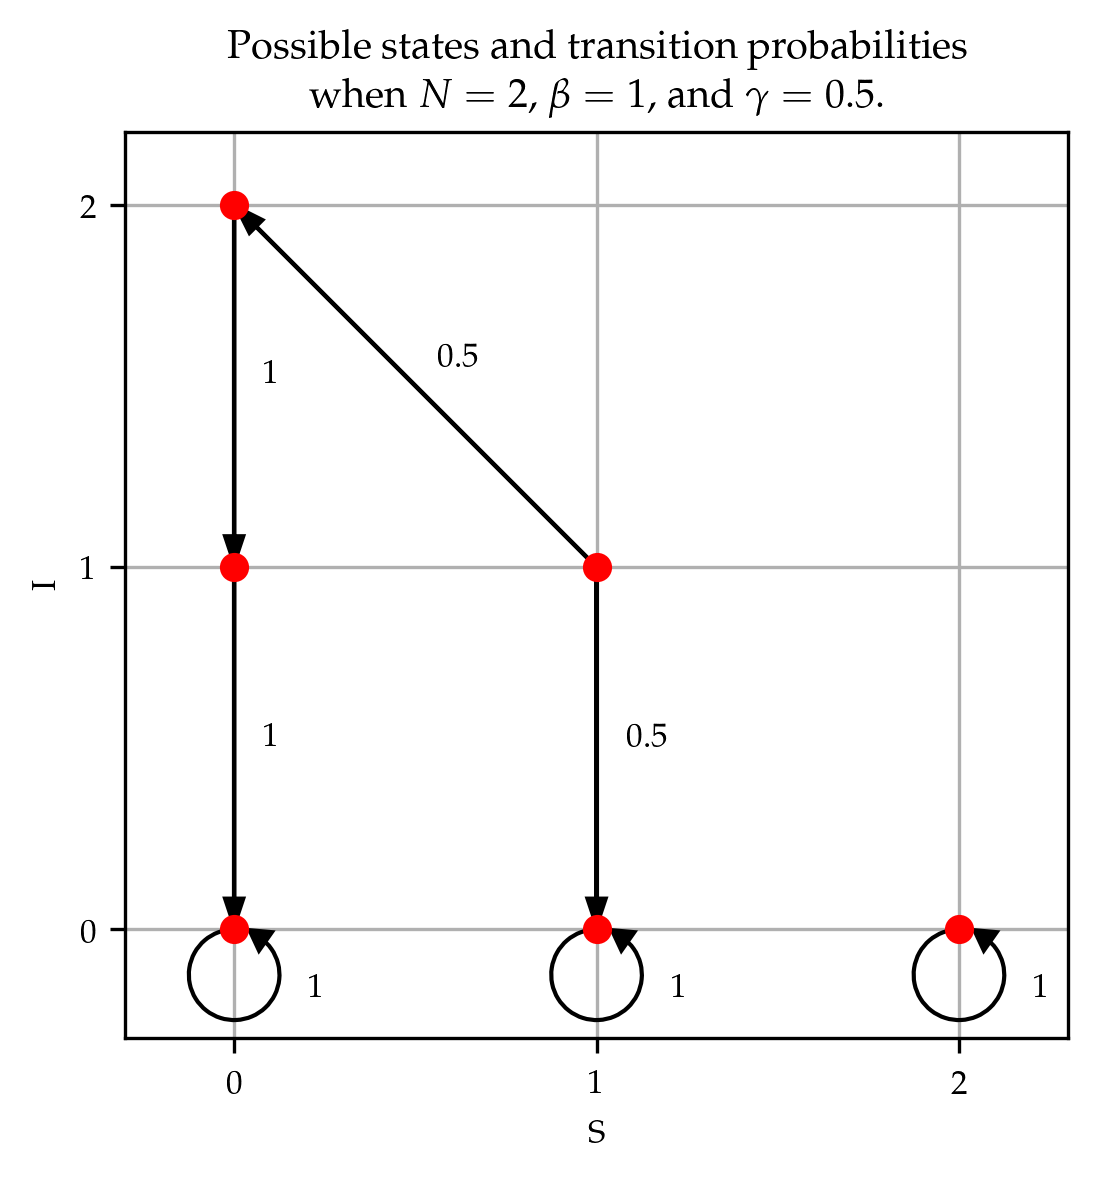

In [22]:
from math import sqrt

from matplotlib.patches import Arc, RegularPolygon
from numpy import radians as rad
point_size = 0.01
eps = .08
eps_diag = eps * .7
head_width = 0.05

def edge(x_start, y_start, x_end, y_end, prob, point_size, color='black'):
    if x_start != x_end:  # we go up and left
        x_end = x_end + point_size / sqrt(2)
        y_end = y_end - point_size / sqrt(2)
        plt.annotate(str(prob), [x_start + (x_end-x_start)/2 + eps_diag,
                                 eps_diag + y_start + (y_end-y_start)/2])
    else:  # we go down
        y_end = y_end + point_size
        plt.annotate(str(prob), [x_start+eps, y_start + (y_end-y_start)/2])
    plt.arrow(x_start, y_start, x_end-x_start, y_end-y_start, head_width=head_width,
          length_includes_head=True, color=color)

def self_loop(x_center, y_center, diameter=0.25, angle=90 ,
             theta2=325, color='black', lw=1):
    ax = plt.gca()
    # circle
    arc = Arc([x_center, y_center-diameter/2], diameter, diameter, angle=angle,
          theta1=0, theta2=theta2, capstyle='round', linestyle='-',
          lw=lw, color=color)
    ax.add_patch(arc)
    # annotation
    plt.annotate("1", [x_center+diameter/2+eps, -diameter*.75])
    # arrow
    x_end=x_center+(diameter/2)*np.cos(rad(theta2+angle))
    y_end=y_center-diameter/2+(diameter/2)*np.sin(rad(theta2+angle))
    
    ax.add_patch(
        RegularPolygon(
            (x_end, y_end),
            3,  # number of vertices
            diameter/7,  # size
            rad(angle+theta2),  # orientation
            color=color
        )
    )

plt.figure(dpi=300, figsize=(5.51, 4))
plt.title("Possible states and transition probabilities\n" +
          "when $N =" + str(n) + "$, $\\beta = " + str(beta) +
          "$, and $\\gamma = " + str(gamma) + "$.")

plt.axes().set_aspect("equal")
plt.grid()
plt.gca().set_axisbelow(True)
plt.xlabel("S")
plt.ylabel("I")
plt.xlim([-.3, 2.3])
plt.ylim([-.3, 2.2])
plt.xticks(range(n+1))
plt.yticks(range(n+1))

# points
plt.plot(*zip(*possible_states), 'ro', markersize=6)
# arrows
edge(0, 1, 0, 0, 1, point_size=point_size)
edge(0, 2, 0, 1, 1, point_size=point_size)
edge(1, 1, 0, 2, 0.5, point_size=point_size)
edge(1, 1, 1, 0, 0.5, point_size=point_size)
self_loop(0, 0)
self_loop(1, 0)
self_loop(2, 0)

## A Priori Distribution

In [23]:
import numpy as np

sir_model = StochasticSIR(s_0=1000,
                          i_0=300,
                          r_0=0,
                          beta=1,
                          gamma=0.2
)
sir_model.simulate(t_max=np.inf,
                   n_simulations=n_simulations,
                   random_state=random_state
)

In [24]:
from py_hawkesn_sir.py_hawkesn_sir.util import get_index

In [25]:
n = 1300
trans_mat = StochasticSIR.transition_matrix(
    n,
    beta=sir_model.beta,
    gamma=sir_model.gamma
)
n_possible_states = sum(range(n+2))
state_arr = np.zeros(n_possible_states)
s, i = 1000, 300
state_arr[get_index(s, i, n)] = 1

Text(0.5, 1.0, 'a priori distribution of total infections')

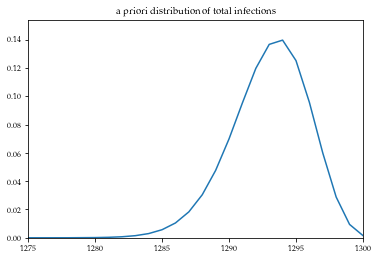

In [26]:
state_apr = state_arr.copy()
for _ in range(2*n - 1):
    state_apr = trans_mat.dot(state_apr)

state_indices_end = [None for _ in range(n+1)]
for n_susceptibles_end in range(n+1):
    state_indices_end[n_susceptibles_end] = get_index(
        n_susceptibles_end , 0, n)
plt.figure()
plt.xlim(1275, 1300)
plt.ylim(ymin=0, ymax=max(state_apr)*1.1)
plt.plot(
    n-np.arange(n+1),
    state_apr[state_indices_end],
    label="a priori"
)
plt.title("a priori distribution of total infections")

## A Posteriori Distribution

In [27]:
def state_after_time(time, simulation):
    """
    Parameters
    ==========
    
    time : float
    
    simulation : pandas.DataFrame
    
    Returns
    =======
    state_tuple : tuple
        Tuple with two entries. The first (second) entry
        specifies the number of susceptibles (infected)
        after time `time`.
    """
    row = simulation.t.values.searchsorted(time, side="right") - 1
    state = simulation.iloc[row]
    return int(state["s"]), int(state["i"])

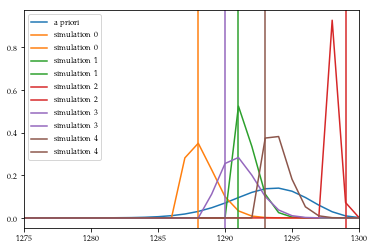

In [28]:
plt.plot(n-np.arange(n+1),
         state_apr[state_indices_end],
         label="a priori")

for sim_ind in range(5):
    epidemic_time = sir_model.data_[sim_ind].t.values[-1]
    time = epidemic_time / 2
    s_apo, i_apo = state_after_time(time, sir_model.data_[sim_ind])
    state_apo = np.zeros(n_possible_states)
    state_apo[get_index(s_apo, i_apo, n)] = 1
    for _ in range(2*n - 1):
        state_apo = trans_mat.dot(state_apo)
    plt.plot(n-np.arange(n+1),
             state_apo[state_indices_end],
             color="C"+str(sim_ind+1),
             label="simulation " + str(sim_ind))
    tot_inf = n - state_after_time(np.inf, sir_model.data_[sim_ind])[0]
    plt.axvline(tot_inf,
                color="C"+str(sim_ind+1),
                #label="simulation " + str(sim_ind)
    )
plt.xlim(1275, 1300)
plt.legend()